In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os,sys
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from keras import initializers
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from tensorflow.keras.models import Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

In [ ]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

In [ ]:
from keras.applications.vgg19 import VGG19

In [ ]:

#print('Initializer: ',initializer)

def Upload_Dataset(Dataset_Path):
    
    Path_train_Dataset = Dataset_Path+"/train"
    Path_test_Dataset = Dataset_Path+"/test"
    Path_val_Dataset = Dataset_Path+"/val"
    
    Input_train_Dataset, Input_test_Dataset, Input_val_Dataset = [], [], []
    Output_train, Output_test, Output_val = [], [], []

    for j in os.listdir(Path_train_Dataset):

        if j != ".DS_Store":
            #print(j)
            for k in os.listdir(Path_train_Dataset+"/"+j):
                img=cv2.imread(Path_train_Dataset+"/"+j+"/"+k)
                Input_train_Dataset.append(cv2.resize(img, (224, 224)))
                if(j == 'brain'):
                    #print('0 Entered ',j)
                    Output_train.append(int(0))
                elif(j == 'ewer'):
                    #print('1 Entered ',j)
                    Output_train.append(int(1))
                elif(j == 'helicopter'):
                    #print('2 Entered ',j)
                    Output_train.append(int(2))
                elif(j == 'scorpion'):
                    #print('3 Entered ',j)
                    Output_train.append(int(3))
                else:
                    #print('4 Entered ',j)
                    Output_train.append(int(4))

            for k in os.listdir(Path_test_Dataset+"/"+j):
                img=cv2.imread(Path_test_Dataset+"/"+j+"/"+k)
                Input_test_Dataset.append(cv2.resize(img, (224, 224)))
                if(j == 'brain'):
                    Output_test.append(int(0))
                elif(j == 'ewer'):
                    Output_test.append(int(1))
                elif(j == 'helicopter'):
                    Output_test.append(int(2))
                elif(j == 'scorpion'):
                    Output_test.append(int(3))
                else:
                    Output_test.append(int(4))

            for k in os.listdir(Path_val_Dataset+"/"+j):
                img=cv2.imread(Path_val_Dataset+"/"+j+"/"+k)
                Input_val_Dataset.append(cv2.resize(img, (224, 224)))
                if(j == 'brain'):
                    Output_val.append(int(0))
                elif(j == 'ewer'):
                    Output_val.append(int(1))
                elif(j == 'helicopter'):
                    Output_val.append(int(2))
                elif(j == 'scorpion'):
                    Output_val.append(int(3))
                else:
                    Output_val.append(int(4))
        
    #print(Output_train)            
    Input_train_Dataset, Input_test_Dataset, Input_val_Dataset = np.array(Input_train_Dataset), np.array(Input_test_Dataset), np.array(Input_val_Dataset)
    #Output_train, Output_test, Output_val = np.array(list(map(int, Output_train))), np.array(list(map(int, Output_test))), np.array(list(map(int, Output_val)))
    Output_train, Output_test, Output_val = np.array(Output_train), np.array(Output_test), np.array(Output_val)
    #print(Output_train) 
    return Input_train_Dataset, Input_test_Dataset,Input_val_Dataset, Output_train, Output_test, Output_val



#providing path of  MNIST dataset
Dataset_Path = "/content/drive/MyDrive/DLA5/Group_1"


#calling Upload_Dataset function
trainInp, testInp,valInp, trainOut, testOut, valOut= Upload_Dataset(Dataset_Path)



In [ ]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [ ]:
trainInp=x = preprocess_input(trainInp)

In [ ]:
vgg19=VGG19(weights="imagenet")
for layer in vgg19.layers:
    layer.trainable = False
vgg19.summary()


574710816/574710816 [==============================] - 3s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:
#x = Flatten()(vgg19.output)
#l1 = Dense(4096, activation='sigmoidal')(x)
#l2 = Dense(4096, activation='sigmoidal')(l1)
x = vgg19.get_layer('fc2').output
#x = GlobalAveragePooling2D()(x)
#l1 = Dense(4096, activation='relu')(x)
#l2 = Dense(4096, activation='relu')(l1)
prediction = Dense(5, activation='softmax')(x)
model = Model(inputs=vgg19.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
es = EarlyStopping(monitor='loss',min_delta=0.0001, patience=2,verbose=1)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
history = model.fit(x = trainInp, y = trainOut, batch_size = 32, epochs = 100, verbose = "auto", callbacks=[es], validation_data=(valInp,  valOut), validation_batch_size=1)

#Evaluating the model
print('\nEvaluation of model on train data:')
trainAcc=model.evaluate(x=trainInp,y=trainOut,batch_size=1, verbose="auto",callbacks=None)
print(model.metrics_names)
print(trainAcc)

print('\nEvaluation of model on validation data:')
valAcc=model.evaluate(x=valInp, y=valOut, batch_size=1, verbose="auto",callbacks=None)
print(model.metrics_names)
print(valAcc)

print('\nEvaluation of model on test data:')
testAcc=model.evaluate(x=testInp, y=testOut, batch_size=1, verbose="auto",callbacks=None)
print(model.metrics_names)
print(testAcc)

print('\nPredictions for test data:')
testProb=model.predict(testInp, batch_size=1, verbose="auto", callbacks=None)
pred=np.argmax(testProb,axis=1)


#3-3
confusionMatrix=tf.math.confusion_matrix(testOut,pred)
print(confusionMatrix)

Epoch 1/100
8/8 [==============================] - 238s 30s/step - loss: 0.9588 - accuracy: 0.7320 - val_loss: 0.2029 - val_accuracy: 0.9400
Epoch 2/100
8/8 [==============================] - 276s 36s/step - loss: 0.0159 - accuracy: 1.0000 - val_loss: 0.1643 - val_accuracy: 0.9400
Epoch 3/100
8/8 [==============================] - 265s 32s/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.1417 - val_accuracy: 0.9400
Epoch 4/100
8/8 [==============================] - 277s 36s/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.1306 - val_accuracy: 0.9400
Epoch 5/100
8/8 [==============================] - 283s 37s/step - loss: 9.4370e-04 - accuracy: 1.0000 - val_loss: 0.1261 - val_accuracy: 0.9400
Epoch 6/100
8/8 [==============================] - 281s 36s/step - loss: 6.5040e-04 - accuracy: 1.0000 - val_loss: 0.1263 - val_accuracy: 0.9400
Epoch 7/100
8/8 [==============================] - 245s 31s/step - loss: 4.8248e-04 - accuracy: 1.0000 - val_loss: 0.1286 - val_accuracy: 0.9400
E

Guided back propogation

In [ ]:
import torch
from torch import nn
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt


class Guided_backprop():
    def __init__(self, model):
        self.model = model
        self.image_reconstruction = None # store R0
        self.activation_maps = []  # store f1, f2, ... 
        self.model.eval()
        self.register_hooks()

    def register_hooks(self):
        def first_layer_hook_fn(module, grad_in, grad_out):
            self.image_reconstruction = grad_in[0] 

        def forward_hook_fn(module, input, output):
            self.activation_maps.append(output)

        def backward_hook_fn(module, grad_in, grad_out):
            grad = self.activation_maps.pop() 
            # for the forward pass, after the ReLU operation, 
            # if the output value is positive, we set the value to 1,
            # and if the output value is negative, we set it to 0.
            grad[grad > 0] = 1 
            
            # grad_out[0] stores the gradients for each feature map,
            # and we only retain the positive gradients
            positive_grad_out = torch.clamp(grad_out[0], min=0.0)
            new_grad_in = positive_grad_out * grad

            return (new_grad_in,)


        # AlexNet model 
        modules = list(self.model.features.named_children())

        # travese the modules，register forward hook & backward hook
        # for the ReLU
        for name, module in modules:
            if isinstance(module, nn.ReLU):
                module.register_forward_hook(forward_hook_fn)
                module.register_backward_hook(backward_hook_fn)

        # register backward hook for the first conv layer
        first_layer = modules[0][1] 
        first_layer.register_backward_hook(first_layer_hook_fn)

    def visualize(self, input_image, target_class):
        model_output = self.model(input_image)
        self.model.zero_grad()
        pred_class = model_output.argmax().item()
        
        grad_target_map = torch.zeros(model_output.shape,
                                      dtype=torch.float)
        if target_class is not None:
            grad_target_map[0][target_class] = 1
        else:
            grad_target_map[0][pred_class] = 1
        
        model_output.backward(grad_target_map)
        
        result = self.image_reconstruction.data[0].permute(1,2,0)
        return result.numpy()

def normalize(image):
    norm = (image - image.mean())/image.std()
    norm = norm * 0.1
    norm = norm + 0.5
    norm = norm.clip(0, 1)
    return norm




In [ ]:

image = Image.open('/content/drive/MyDrive/DLA5/Group_1/train/ewer/image_0004.jpg')


transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

 Architecture:
 ------------------------------------------------------------ 
 VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(i

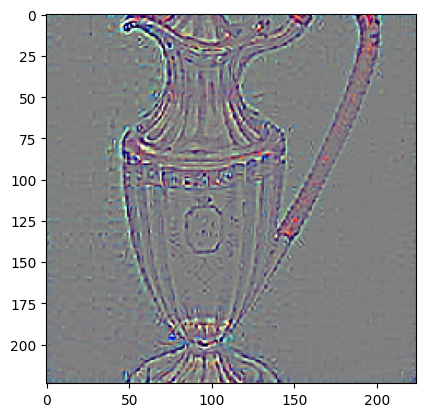

In [ ]:
tensor = transform(image).unsqueeze(0).requires_grad_()
    
model = models.vgg19(pretrained=True)
print(' Architecture:\n', '-'*60, '\n', model, '\n', '-'*60)

guided_bp = Guided_backprop(model)
result = guided_bp.visualize(tensor, None)

result = normalize(result)
plt.imshow(result)
plt.show()